In [1]:
import torch
import random
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import random_split,DataLoader

In [2]:
dataset = MNIST(root='datasets/', download=True)

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets/
    Split: Train

In [4]:
test_dataset = MNIST(root='datasets/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x20003D253D0>, 5)

Label:  5


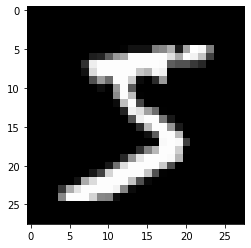

In [6]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

Label:  3


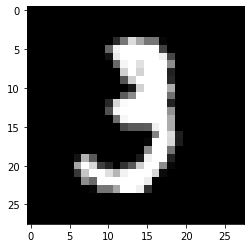

In [7]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label: ', label)

In [8]:
dataset = MNIST(root='datasets/', train=True, transform= transforms.ToTensor())

In [9]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [10]:
print(img_tensor[:, 10:15, 10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


In [11]:
print(torch.max(img_tensor), torch.min(img_tensor))

tensor(1.) tensor(0.)


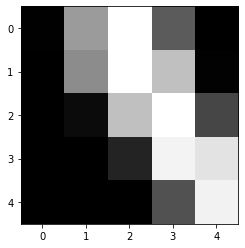

In [12]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [13]:
train_ds, valid_ds = random_split(dataset, [50000,10000])
len(train_ds), len(valid_ds)

(50000, 10000)

In [14]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(valid_ds, batch_size)

In [15]:
#logistic regression model
input_size =  28 * 28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [16]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0305, -0.0349,  0.0325,  ...,  0.0086, -0.0034, -0.0323],
        [-0.0316, -0.0281,  0.0194,  ...,  0.0144, -0.0092,  0.0261],
        [-0.0102, -0.0174,  0.0012,  ...,  0.0267, -0.0196,  0.0294],
        ...,
        [ 0.0187, -0.0230,  0.0029,  ..., -0.0295, -0.0010,  0.0318],
        [ 0.0085,  0.0037, -0.0157,  ...,  0.0019, -0.0236,  0.0163],
        [-0.0088,  0.0012, -0.0216,  ...,  0.0336, -0.0106, -0.0116]],
       requires_grad=True)

In [17]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0299, -0.0035,  0.0327,  0.0297, -0.0304,  0.0052,  0.0119,  0.0232,
        -0.0215, -0.0277], requires_grad=True)

In [18]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([2, 4, 8, 5, 4, 7, 4, 7, 3, 4, 0, 1, 2, 7, 4, 0, 5, 0, 4, 9, 4, 0, 1, 4,
        4, 4, 3, 6, 1, 7, 8, 5, 6, 9, 3, 1, 2, 3, 2, 5, 0, 6, 4, 2, 3, 4, 3, 3,
        1, 9, 5, 6, 7, 2, 0, 1, 3, 7, 1, 4, 3, 5, 1, 9, 4, 3, 3, 7, 3, 9, 5, 4,
        1, 1, 7, 9, 6, 1, 3, 2, 8, 0, 7, 3, 3, 4, 5, 3, 1, 8, 5, 3, 2, 5, 0, 2,
        9, 1, 3, 6, 0, 3, 7, 0, 6, 5, 3, 2, 3, 8, 9, 9, 5, 1, 9, 7, 9, 9, 4, 1,
        2, 9, 8, 5, 4, 2, 3, 5])
torch.Size([128, 1, 28, 28])


RuntimeError: size mismatch, m1: [3584 x 28], m2: [784 x 10] at C:\w\b\windows\pytorch\aten\src\TH/generic/THTensorMath.cpp:41

In [20]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,28*28)
        output = self.linear(xb)
        return output

In [21]:
model = MnistModel()

In [22]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0232, -0.0301,  0.0327,  ..., -0.0144, -0.0020, -0.0205],
         [-0.0328,  0.0204,  0.0311,  ..., -0.0042,  0.0257, -0.0182],
         [-0.0115,  0.0356,  0.0302,  ..., -0.0278, -0.0049,  0.0181],
         ...,
         [-0.0021,  0.0023, -0.0083,  ...,  0.0187, -0.0078,  0.0267],
         [ 0.0092,  0.0234,  0.0056,  ...,  0.0320,  0.0091, -0.0329],
         [ 0.0192,  0.0093, -0.0304,  ...,  0.0320,  0.0342, -0.0161]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0004,  0.0158, -0.0207, -0.0170,  0.0298,  0.0088, -0.0037,  0.0229,
         -0.0267,  0.0221], requires_grad=True)]

In [23]:
for images, labels in train_loader:
    outputs = model(images)
    break

In [24]:
print('output shape: ', outputs.shape)
print('sample data: ', outputs[:2].data)

output shape:  torch.Size([128, 10])
sample data:  tensor([[ 0.0626,  0.2413,  0.4493, -0.3644,  0.3719,  0.2025, -0.0146,  0.0131,
         -0.0702,  0.1059],
        [-0.0915, -0.1317,  0.1880, -0.1602,  0.1846,  0.2799, -0.3447,  0.2180,
         -0.0808, -0.1066]])


In [25]:
probs = F.softmax(outputs, dim=1)
print("Sample probabilities: ", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:  tensor([[0.0941, 0.1125, 0.1385, 0.0614, 0.1282, 0.1082, 0.0871, 0.0895, 0.0824,
         0.0982],
        [0.0899, 0.0864, 0.1189, 0.0840, 0.1185, 0.1304, 0.0698, 0.1226, 0.0909,
         0.0886]])
Sum:  0.9999999403953552


In [26]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([2, 5, 4, 4, 2, 4, 5, 4, 4, 7, 4, 4, 5, 4, 4, 4, 2, 4, 4, 5, 4, 5, 4, 2,
        4, 4, 4, 1, 4, 5, 0, 4, 5, 5, 4, 5, 5, 2, 4, 5, 5, 4, 5, 4, 2, 2, 8, 2,
        4, 2, 5, 2, 4, 2, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5,
        5, 5, 2, 1, 2, 2, 4, 2, 4, 5, 4, 2, 5, 4, 2, 4, 5, 6, 4, 4, 4, 4, 5, 4,
        4, 9, 2, 2, 4, 4, 4, 1, 4, 5, 4, 4, 4, 2, 7, 4, 2, 4, 5, 4, 7, 5, 8, 4,
        5, 5, 5, 2, 4, 2, 2, 4])
tensor([0.1385, 0.1304, 0.2071, 0.1356, 0.1352, 0.1258, 0.1296, 0.1712, 0.1715,
        0.1364, 0.1483, 0.1772, 0.1553, 0.1655, 0.1168, 0.1201, 0.1268, 0.1404,
        0.1768, 0.1217, 0.1528, 0.1310, 0.1461, 0.1267, 0.1836, 0.1176, 0.1497,
        0.1234, 0.1854, 0.1324, 0.1455, 0.1655, 0.1344, 0.1363, 0.1880, 0.1391,
        0.1406, 0.1408, 0.1217, 0.1169, 0.1155, 0.1327, 0.1358, 0.1254, 0.1378,
        0.1347, 0.1377, 0.1406, 0.1900, 0.1240, 0.1259, 0.1202, 0.1232, 0.1111,
        0.1620, 0.1260, 0.1439, 0.1139, 0.1790, 0.1314, 0.1209, 0.1427, 0.1556,
       

In [27]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [28]:
accuracy(outputs, labels)

tensor(0.0781)

In [29]:
loss_fn = F.cross_entropy

In [30]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3219, grad_fn=<NllLossBackward>)


In [31]:
class MnistModel(nn.Module):
    
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 28*28)
        output = self.linear(xb)
        return output
    
    def training_step(self, batch):
        images, labels = batch
        output = self(images)
        loss = F.cross_entropy(output, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        output = self(images)
        val_loss = F.cross_entropy(output, labels)
        val_acc = accuracy(output, labels)
        return {'val_loss':val_loss, 'val_acc':val_acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss, 'val_acc':epoch_acc}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [32]:
model = MnistModel(input_size, num_classes)

In [33]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [34]:
def fit(epochs, lr, model, train_loader, val_loader, optim_func=torch.optim.SGD):
    history = []
    optimizer = optim_func(model.parameters(),lr)
    
    for epoch in range(epochs):
        
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [35]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': tensor(2.2960, grad_fn=<MeanBackward0>),
 'val_acc': tensor(0.0818)}

In [37]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1175, val_acc: 0.8094
Epoch [1], val_loss: 1.0454, val_acc: 0.8157
Epoch [2], val_loss: 0.9863, val_acc: 0.8209
Epoch [3], val_loss: 0.9372, val_acc: 0.8265
Epoch [4], val_loss: 0.8955, val_acc: 0.8298


In [38]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8599, val_acc: 0.8329
Epoch [1], val_loss: 0.8289, val_acc: 0.8357
Epoch [2], val_loss: 0.8018, val_acc: 0.8384
Epoch [3], val_loss: 0.7778, val_acc: 0.8409
Epoch [4], val_loss: 0.7564, val_acc: 0.8434


In [39]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7372, val_acc: 0.8451
Epoch [1], val_loss: 0.7199, val_acc: 0.8477
Epoch [2], val_loss: 0.7042, val_acc: 0.8494
Epoch [3], val_loss: 0.6898, val_acc: 0.8521
Epoch [4], val_loss: 0.6767, val_acc: 0.8532


Text(0.5, 1.0, 'Accuracy')

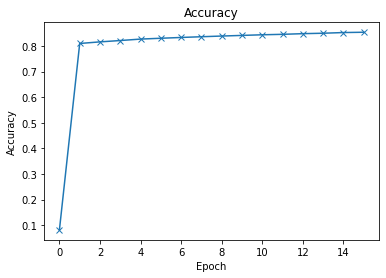

In [40]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')

In [41]:
test_dataset = MNIST(root='datasets/',
                    train=False,
                    transform=transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


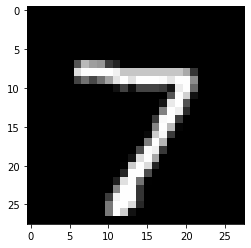

In [42]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape: ', img.shape)
print('Label: ', label)

In [43]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [44]:
def predict(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, pred = torch.max(yb, dim=1)
    return pred[0].item()

Label:  7 Predicted:  7


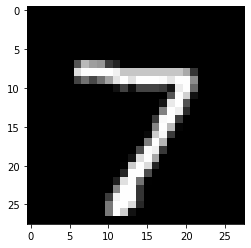

In [45]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label: ', label,'Predicted: ',predict(img, model))

In [46]:
random_test_index = random.sample(range(10000), 10)

In [47]:
for index in random_test_index:
    img, label = test_dataset[index]
    print('Label: ',label, 'Predicted: ',predict(img, model))

Label:  1 Predicted:  1
Label:  7 Predicted:  7
Label:  2 Predicted:  2
Label:  7 Predicted:  7
Label:  1 Predicted:  1
Label:  7 Predicted:  7
Label:  1 Predicted:  5
Label:  7 Predicted:  7
Label:  1 Predicted:  1
Label:  7 Predicted:  7


In [48]:
test_loader  = DataLoader(test_dataset, batch_size=128)
result = evaluate(model, test_loader)
result

{'val_loss': tensor(0.6406, grad_fn=<MeanBackward0>),
 'val_acc': tensor(0.8621)}

In [50]:
torch.save(model.state_dict(), 'mnist_logistic.pth')

In [52]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0008,  0.0078, -0.0134,  ...,  0.0274,  0.0218, -0.0085],
                      [ 0.0197, -0.0059, -0.0126,  ...,  0.0161,  0.0166, -0.0061],
                      [ 0.0293,  0.0083, -0.0089,  ...,  0.0029,  0.0029,  0.0318],
                      ...,
                      [-0.0163,  0.0348, -0.0293,  ...,  0.0186,  0.0056,  0.0093],
                      [-0.0330, -0.0212, -0.0211,  ...,  0.0109, -0.0156, -0.0136],
                      [ 0.0134,  0.0112, -0.0280,  ...,  0.0199, -0.0150,  0.0034]])),
             ('linear.bias',
              tensor([-0.0414,  0.1327, -0.0072, -0.0353,  0.0450,  0.0236, -0.0317,  0.0163,
                      -0.1012,  0.0169]))])

In [54]:
model2 = MnistModel(input_size, num_classes)
model2.load_state_dict(torch.load('mnist_logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0008,  0.0078, -0.0134,  ...,  0.0274,  0.0218, -0.0085],
                      [ 0.0197, -0.0059, -0.0126,  ...,  0.0161,  0.0166, -0.0061],
                      [ 0.0293,  0.0083, -0.0089,  ...,  0.0029,  0.0029,  0.0318],
                      ...,
                      [-0.0163,  0.0348, -0.0293,  ...,  0.0186,  0.0056,  0.0093],
                      [-0.0330, -0.0212, -0.0211,  ...,  0.0109, -0.0156, -0.0136],
                      [ 0.0134,  0.0112, -0.0280,  ...,  0.0199, -0.0150,  0.0034]])),
             ('linear.bias',
              tensor([-0.0414,  0.1327, -0.0072, -0.0353,  0.0450,  0.0236, -0.0317,  0.0163,
                      -0.1012,  0.0169]))])

In [55]:
test_loader  = DataLoader(test_dataset, batch_size=128)
result = evaluate(model2, test_loader)
result

{'val_loss': tensor(0.6406, grad_fn=<MeanBackward0>),
 'val_acc': tensor(0.8621)}